<a href="https://colab.research.google.com/github/roxacarv/edulearn/blob/main/regress%C3%A3o_linear/regress%C3%A3o_edulearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando as bibliotecas


In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Importando a base de dados que irá alimentar o modelo

In [37]:
df_2011 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2011.csv', usecols=['CO_ALUNO'])
df_2011['NU_ANO_CENSO'] = 2011
df_2011['QNT_DE_ALUNOS'] = 1
df_2011 = df_2011.drop(['CO_ALUNO'], axis=1)

In [38]:
df_2012 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2012.csv', usecols=['CO_ALUNO'])
df_2012['NU_ANO_CENSO'] = 2012
df_2012['QNT_DE_ALUNOS'] = 1
df_2012 = df_2012.drop(['CO_ALUNO'], axis=1)

In [39]:
df_2013 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2013.csv', usecols=['CO_ALUNO'])
df_2013['NU_ANO_CENSO'] = 2013
df_2013['QNT_DE_ALUNOS'] = 1
df_2013 = df_2013.drop(['CO_ALUNO'], axis=1)

In [40]:
df_2014 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2014.csv', usecols=['CO_ALUNO'])
df_2014['NU_ANO_CENSO'] = 2014
df_2014['QNT_DE_ALUNOS'] = 1
df_2014 = df_2014.drop(['CO_ALUNO'], axis=1)

In [41]:
df_2015 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2015.csv', usecols=['CO_ALUNO'])
df_2015['NU_ANO_CENSO'] = 2015
df_2015['QNT_DE_ALUNOS'] = 1
df_2015 = df_2015.drop(['CO_ALUNO'], axis=1)

In [42]:
df_2016 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2016.csv', usecols=['CO_ALUNO'])
df_2016['NU_ANO_CENSO'] = 2016
df_2016['QNT_DE_ALUNOS'] = 1
df_2016 = df_2016.drop(['CO_ALUNO'], axis=1)

In [43]:
df_2017 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2017.csv', usecols=['CO_ALUNO'])
df_2017['NU_ANO_CENSO'] = 2017
df_2017['QNT_DE_ALUNOS'] = 1
df_2017 = df_2017.drop(['CO_ALUNO'], axis=1)

In [47]:
df_2018 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2018.csv', usecols=['ID_ALUNO'])
df_2018['NU_ANO_CENSO'] = 2018
df_2018['QNT_DE_ALUNOS'] = 1
df_2018 = df_2018.drop(['ID_ALUNO'], axis=1)

In [48]:
df_2019 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2019.csv', usecols=['ID_ALUNO'])
df_2019['NU_ANO_CENSO'] = 2019
df_2019['QNT_DE_ALUNOS'] = 1
df_2019 = df_2019.drop(['ID_ALUNO'], axis=1)

In [49]:
lista_dfs = [df_2011, df_2012, df_2013, df_2014, df_2015, df_2016, df_2017, df_2018, df_2019]
df_regressao = pd.concat(lista_dfs)
df_alunos_anos = df_regressao.groupby('NU_ANO_CENSO').sum().reset_index()
df_alunos_anos

,NU_ANO_CENSO,QNT_DE_ALUNOS
0,2011,29033
1,2012,34656
2,2013,37796
3,2014,45088
4,2015,51685
5,2016,49813
6,2017,52542
7,2018,59496
8,2019,66750


In [50]:
df_alunos_anos.corr()

,NU_ANO_CENSO,QNT_DE_ALUNOS
NU_ANO_CENSO,1.000000,0.980365
QNT_DE_ALUNOS,0.980365,1.000000


Checando se existe uma grande correlação entre as variaveis

# Inicio do ML

In [52]:
df_alunos_anos.columns

Index(['NU_ANO_CENSO', 'QNT_DE_ALUNOS'], dtype='object')

In [59]:
x = df_alunos_anos['NU_ANO_CENSO'].values
Y = df_alunos_anos['QNT_DE_ALUNOS'].values

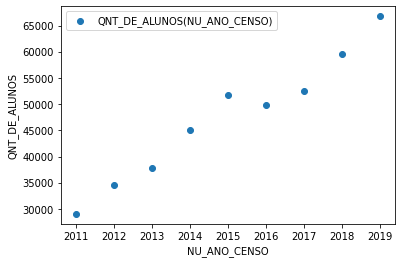

In [54]:
plt.scatter(x,y,label='QNT_DE_ALUNOS(NU_ANO_CENSO)');
plt.xlabel('NU_ANO_CENSO');
plt.ylabel('QNT_DE_ALUNOS');
plt.legend();

In [55]:
modelo = LinearRegression()

In [56]:
X = x.reshape(-1, 1)

In [60]:
modelo.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [74]:
acuracia = modelo.score(X, Y)

In [75]:
print("Acuracia = {:0.2f}".format(acuracia))

Acuracia = 0.96


In [63]:
coef_angular = modelo.coef_[0]

In [64]:
coef_linear = modelo.intercept_

In [72]:
print("Coeficiente angular = {:0.2f}".format(coef_angular))

Coeficiente angular = 4326.75


In [68]:
print("Coeficiente linear = {:0.2f}".format(coef_linear))

Coeficiente linear = -8670972.47


In [69]:
reta = coef_angular*X+coef_linear

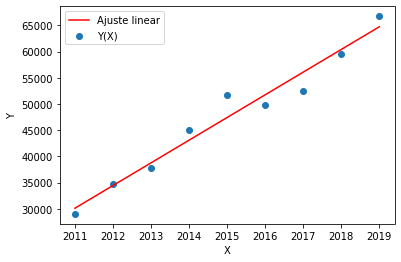

In [70]:
plt.scatter(X,Y,label='Y(X)');
plt.plot(X,reta,label='Ajuste linear',color='red');
plt.xlabel('X');
plt.ylabel('Y');
plt.legend();

In [71]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

MAE = mean_absolute_error(Y,reta)
RMSE = np.sqrt(mean_squared_error(Y,reta))

print("MAE = {:0.2f}".format(MAE))
print("RMSE = {:0.2f}".format(RMSE))

MAE = 1880.86
RMSE = 2247.09


# teste

In [ ]:
df_aluno_2019 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/alunodeficiente_2019.csv', encoding='latin-1', usecols=['NU_ANO_CENSO','CO_CURSO','CO_IES','TP_COR_RACA','TP_SEXO','NU_ANO_NASCIMENTO','CO_PAIS_ORIGEM','TP_SITUACAO','IN_MATRICULA','IN_CONCLUINTE','IN_DEFICIENCIA','IN_DEFICIENCIA_AUDITIVA','IN_DEFICIENCIA_FISICA','IN_DEFICIENCIA_INTELECTUAL','IN_DEFICIENCIA_MULTIPLA','IN_DEFICIENCIA_SURDEZ','IN_DEFICIENCIA_SURDOCEGUEIRA','IN_DEFICIENCIA_BAIXA_VISAO','IN_DEFICIENCIA_CEGUEIRA','IN_DEFICIENCIA_SUPERDOTACAO','IN_TGD_AUTISMO','IN_TGD_SINDROME_ASPERGER','IN_TGD_SINDROME_RETT','IN_TGD_TRANSTOR_DESINTEGRATIVO','IN_RESERVA_DEFICIENCIA'])
df_aluno_2019 = df_aluno_2019.loc[df_aluno_2019['TP_SITUACAO'] == 2]
df_curso_2019 = pd.read_csv('https://raw.githubusercontent.com/roxacarv/edulearn/main/dados/SUP_CURSO_2019.CSV', sep='|', encoding='latin-1', usecols=['NU_ANO_CENSO','CO_IES','CO_UF','CO_MUNICIPIO','CO_CURSO','NO_CURSO','CO_CINE_ROTULO','TP_SITUACAO','TP_GRAU_ACADEMICO','TP_MODALIDADE_ENSINO','IN_AJUDA_DEFICIENTE','IN_MATERIAL_DIGITAL','IN_MATERIAL_AMPLIADO','IN_MATERIAL_TATIL','IN_MATERIAL_IMPRESSO','IN_MATERIAL_AUDIO','IN_MATERIAL_BRAILLE','IN_MATERIAL_LIBRAS','IN_DISCIPLINA_LIBRAS','IN_TRADUTOR_LIBRAS','IN_GUIA_INTERPRETE','IN_RECURSOS_COMUNICACAO','IN_RECURSOS_INFORMATICA','QT_MATRICULA_TOTAL','QT_CONCLUINTE_TOTAL'])

df = pd.merge(df_aluno_2019, df_curso_2019, how='inner', on='CO_CURSO')
df.columns

Index(['NU_ANO_CENSO_x', 'CO_IES_x', 'CO_CURSO', 'TP_COR_RACA', 'TP_SEXO',
       'NU_ANO_NASCIMENTO', 'CO_PAIS_ORIGEM', 'IN_DEFICIENCIA',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_DEFICIENCIA_FISICA',
       'IN_DEFICIENCIA_INTELECTUAL', 'IN_DEFICIENCIA_MULTIPLA',
       'IN_DEFICIENCIA_SURDEZ', 'IN_DEFICIENCIA_SURDOCEGUEIRA',
       'IN_DEFICIENCIA_BAIXA_VISAO', 'IN_DEFICIENCIA_CEGUEIRA',
       'IN_DEFICIENCIA_SUPERDOTACAO', 'IN_TGD_AUTISMO',
       'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT',
       'IN_TGD_TRANSTOR_DESINTEGRATIVO', 'TP_SITUACAO_x',
       'IN_RESERVA_DEFICIENCIA', 'IN_MATRICULA', 'IN_CONCLUINTE',
       'NU_ANO_CENSO_y', 'CO_IES_y', 'CO_UF', 'CO_MUNICIPIO', 'NO_CURSO',
       'TP_SITUACAO_y', 'CO_CINE_ROTULO', 'TP_GRAU_ACADEMICO',
       'TP_MODALIDADE_ENSINO', 'IN_AJUDA_DEFICIENTE', 'IN_MATERIAL_DIGITAL',
       'IN_MATERIAL_AMPLIADO', 'IN_MATERIAL_TATIL', 'IN_MATERIAL_IMPRESSO',
       'IN_MATERIAL_AUDIO', 'IN_MATERIAL_BRAILLE', 'IN_MATERIAL_LIBRAS',
       '